<a href="https://colab.research.google.com/github/NamChangseok/sec4_project/blob/main/mydog_idendification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np          
import pandas as pd        
from random import randint
from tqdm import tqdm      #진행 정도를 알 수 있는 라이브러리
import cv2
import matplotlib.pyplot as plt


In [3]:
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


In [12]:
#시간 소요 떄문에 압축해제를 드라이브 안에서 함
import os
'''
import zipfile
local_zip = '/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/AIBOOT_CAMP/section4/project/')
zip_ref.close()
'''

In [4]:
import os
base_dir='/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'test')

train_okong_dir = os.path.join(train_dir, 'okong_train')
train_other_dir = os.path.join(train_dir, 'other_train')
print(train_okong_dir)
print(train_other_dir)
validation_okong_dir=os.path.join(validation_dir, 'okong_test')
validation_other_dir=os.path.join(validation_dir, 'other_test')
print(validation_okong_dir)
print(validation_other_dir)

/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect/train/okong_train
/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect/train/other_train
/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect/test/okong_test
/content/drive/MyDrive/AIBOOT_CAMP/section4/project/prjoect/test/other_test


In [5]:
print('Total training okong images :', len(os.listdir(train_okong_dir)))
print('Total training other dog images :', len(os.listdir(train_other_dir)))

print('Total test okong images :', len(os.listdir(validation_okong_dir)))
print('Total test other dog images :', len(os.listdir(validation_other_dir)))

Total training okong images : 1798
Total training other dog images : 2232
Total test okong images : 218
Total test other dog images : 517


In [6]:
train_okong_fnames = os.listdir( train_okong_dir )
train_other_fnames = os.listdir( train_other_dir )

print(train_okong_fnames[:5])
print(train_other_fnames[:5])

['20200510_112604.jpg', '20200510_112621.jpg', '20200528_192228.MP4', '20200509_173538.jpg', '20200509_173602.jpg']
['cf82709a00a4f2168555b8f77c0d815d.jpg', 'd05a666072e8d8734124a31e727f23da.jpg', 'cf6e0ec97666cf8ddc3de90f1273ff4d.jpg', 'cfbca2f86b0f5cac31ed9b41d9482661.jpg', 'cf3697f8f3ee67b50cedaa63904ab5e8.jpg']


UnidentifiedImageError: ignored

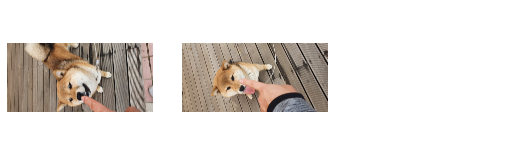

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_okong_dir, fname)
                for fname in train_okong_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_other_dir, fname)
                for fname in train_other_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [9]:
from tensorflow.keras.optimizers import RMSprop
#예 아니오면 되니

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 4011 images belonging to 2 classes.
Found 734 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=70, # 1500개가 있고 배치사이즈가 20이므로 70개로 함
                    epochs=50,
                    validation_steps=10, #200개이고 배치가 20이니 10개
                    verbose=2)
                    
                    

Epoch 1/50
70/70 - 290s - loss: 1.3348 - accuracy: 0.5866 - val_loss: 0.6895 - val_accuracy: 0.5450 - 290s/epoch - 4s/step
Epoch 2/50
70/70 - 173s - loss: 0.6617 - accuracy: 0.6751 - val_loss: 0.6216 - val_accuracy: 0.7100 - 173s/epoch - 2s/step
Epoch 3/50
70/70 - 131s - loss: 0.5997 - accuracy: 0.7536 - val_loss: 0.5731 - val_accuracy: 0.7300 - 131s/epoch - 2s/step
Epoch 4/50
70/70 - 98s - loss: 0.5049 - accuracy: 0.7736 - val_loss: 0.5463 - val_accuracy: 0.7250 - 98s/epoch - 1s/step
Epoch 5/50
70/70 - 81s - loss: 0.4772 - accuracy: 0.7871 - val_loss: 0.5077 - val_accuracy: 0.8150 - 81s/epoch - 1s/step
Epoch 6/50
70/70 - 70s - loss: 0.4698 - accuracy: 0.7793 - val_loss: 0.4983 - val_accuracy: 0.7700 - 70s/epoch - 994ms/step
Epoch 7/50
70/70 - 59s - loss: 0.4306 - accuracy: 0.8045 - val_loss: 0.5447 - val_accuracy: 0.7200 - 59s/epoch - 836ms/step
Epoch 8/50
70/70 - 56s - loss: 0.4283 - accuracy: 0.8059 - val_loss: 0.5211 - val_accuracy: 0.7500 - 56s/epoch - 797ms/step
Epoch 9/50
70/70 

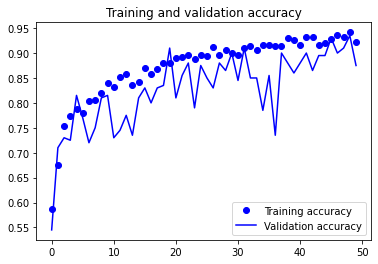

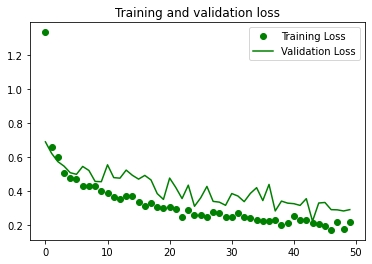

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


Saving 오공5.jpg to 오공5.jpg
[0.]
오공5.jpg 이 사진은 오공이 입니다.


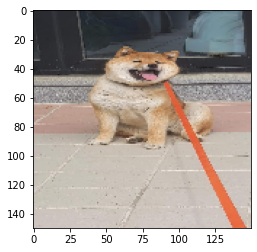

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " 이 사진은 오공이가 아닙니다.")
  else:
    print(fn + " 이 사진은 오공이 입니다.")

 
  plt.imshow(img)

In [19]:
model.save('okong.h5') 
from google.colab import files
files.download('okong.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

img=image.load_img('/Users/namchangseok/Section4/testimage/다른강아지6.jpg',target_size=(150,150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0]>0:
    print('이 사진은 오공이가 아닙니다.')
else:
    print('이 사진은 오공이 입니다.')




이 사진은 오공이가 아닙니다.
